<a href="https://colab.research.google.com/github/faizfadillah31/Data-Science/blob/master/Tugas_7_Datviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import geopandas as gpd
import osmnx as ox 
import matplotlib.pyplot as plt 
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import os
import contextily as ctx
import numpy as np
# tambahkan h3
import h3
# tambahkan folium
import folium

epsg_jkt = 5330
epsg_mercator = 3857
default_crs = {'init':'epsg:4326'}

ModuleNotFoundError: ignored

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.3 MB 58.3 MB/s 
     |████████████████████████████████| 15.4 MB 41.7 MB/s 


In [2]:
!pip install osmnx

     |████████████████████████████████| 95 kB 135 kB/s 
     |████████████████████████████████| 11.2 MB 49.0 MB/s 
     |████████████████████████████████| 62 kB 906 kB/s 
     |████████████████████████████████| 11.3 MB 38.5 MB/s 
     |████████████████████████████████| 994 kB 73.7 MB/s 
     |████████████████████████████████| 15.7 MB 54.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depend

In [3]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [1]:
import pandas as pd 
import geopandas as gpd
import osmnx as ox 
import matplotlib.pyplot as plt 
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import os
import contextily as ctx
import numpy as np

epsg_jkt = 5330
epsg_mercator = 3857
default_crs = {'init':'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
!pip install pygeos

In [3]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-p24yw55f
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-p24yw55f


In [4]:
!pip install rtree

In [5]:
tags = {'amenity': 'cafe'}
cafe = ox.geometries_from_place("Jakarta, Indonesia", tags)
print(len(cafe))

383


In [6]:
# lihat datanya seperti apa
cafe.head()

amenity  ... building:floor
element_type osmid               ...               
node         824317908     cafe  ...            NaN
             824317972     cafe  ...            NaN
             824317998     cafe  ...            NaN
             824318107     cafe  ...            NaN
             1741564285    cafe  ...            NaN

[5 rows x 107 columns]

<AxesSubplot:>

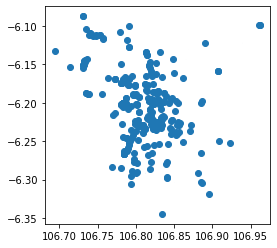

In [18]:
# visualisasikan
cafe.plot()

(106.681097225, 106.975634875, -6.3574337949999995, -6.074797705)

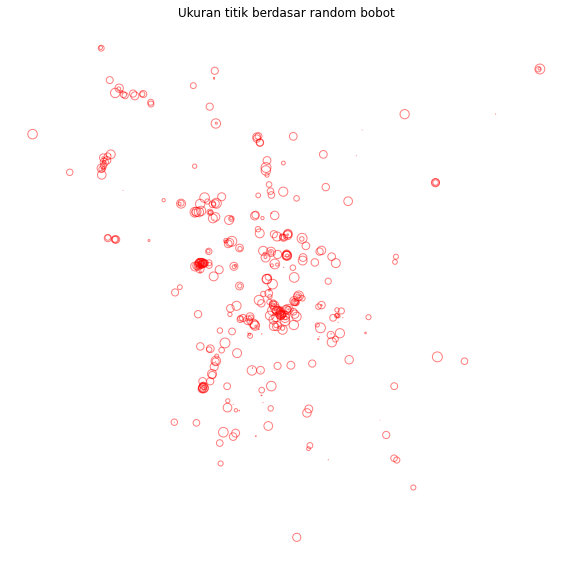

In [7]:
# contoh visualisasi: ukuran titik
# misal diberi bobot tertentu, namakan "random_bobot"
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cafe.plot(markersize=cafe.random_bobot*100, linewidth=1, color='None', edgecolor="red", alpha=0.5, ax=ax)
ax.set_title("Ukuran titik berdasar random bobot")
ax.axis("off")

1. Pada bagian 2.a, cobalah untuk melakukan hal yang sama dengan materi, namun, gantilah warna berdasarkan `random_bobot`.

In [ ]:
# contoh visualisasi: ukuran titik
# misal diberi bobot tertentu, namakan "random_bobot"
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cafe.plot(markersize=cafe.random_bobot*200, linewidth=1, color='blue', edgecolor="red", alpha=0.5, ax=ax)
ax.set_title("Ukuran titik berdasar random bobot")
ax.axis("off")

<AxesSubplot:>

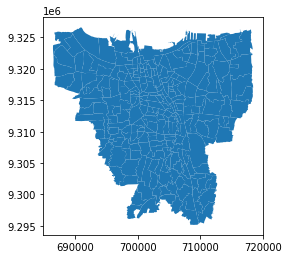

In [8]:
jakarta = gpd.read_file("sample_data/dki_kelurahan")
jakarta.plot()

In [9]:
# proyeksi ke planar
jakarta_planar = jakarta.to_crs(epsg=epsg_jkt)

# hitung luas dalam hektar
jakarta_planar["luas_hektar"] = jakarta_planar.area/(10000^2)

ImportError: ignored

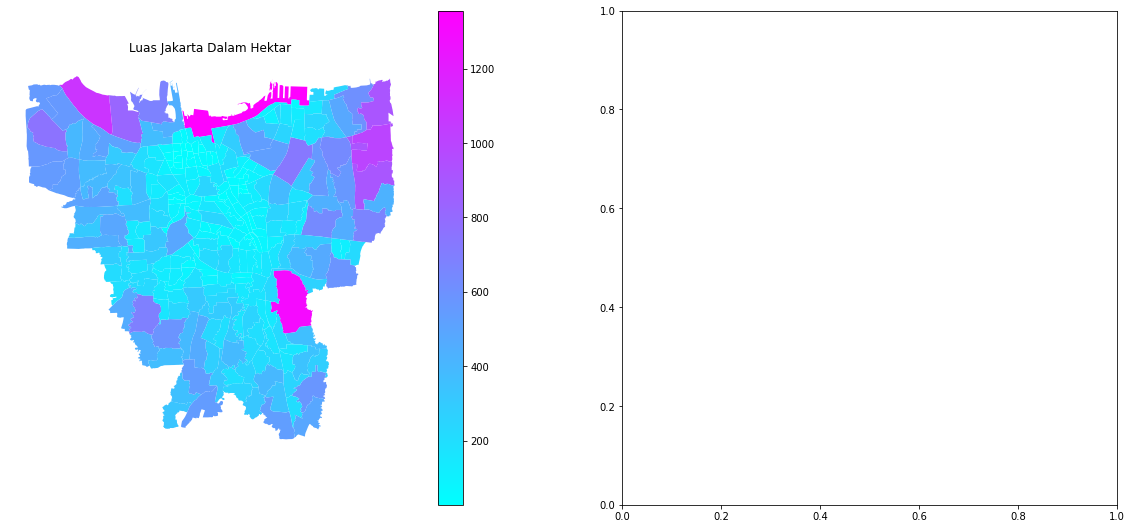

In [19]:
# visualisasikan data luas
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221)
jakarta_planar.plot(column="luas_hektar", cmap="cool", legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar")

ax = fig.add_subplot(222)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="quantiles", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Quantile")

ax = fig.add_subplot(223)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="fisher_jenks", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Fisher Jenks")

ax = fig.add_subplot(224)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="user_defined", classification_kwds={'bins':[150, 250, 500, 800, 10000]}, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: User Defined")

2. Pada bagian 2.b, anda diminta untuk melakukan visualisasi peta jakarta dengan menggunakan scheme yang lain. Hint: cek jakarta_planar.plot?

ImportError: ignored

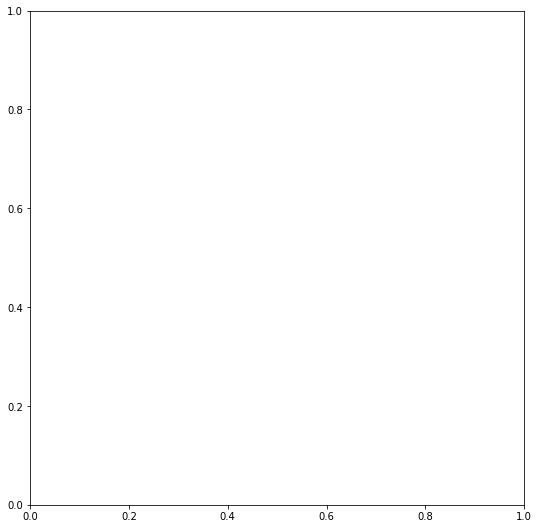

In [20]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="Boxplot", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: NaturalBreaks")

In [15]:
!pip install pandas

In [16]:
import pandas as pd

In [13]:
!pip install openpyxl

In [17]:
transjakarta_lines = gpd.read_file("sample_data/transjakarta/transjakarta_lines.geojson")
transjakarta_data = pd.read_excel("sample_data/transjakarta/TJ_Agustus_2020.xlsx", index_col=0).T.reset_index() #transposed

ImportError: ignored

In [ ]:
# gabungkan data keduanya
transjakarta_lines['koridor'] = transjakarta_lines['koridor'].apply(int)
transjakarta_data['koridor'] = transjakarta_data['index'].apply(int)
transjakarta = pd.merge(transjakarta_lines, transjakarta_data)
# convert kembali ke geodataframe
transjakarta = gpd.GeoDataFrame(transjakarta)
# beri crs
transjakarta.crs = transjakarta_lines.crs
# convert ke planar
transjakarta_planar = transjakarta.to_crs(epsg=epsg_jkt)

NameError: ignored

In [ ]:
# agar bisa menggunakan basemap, harus diconvert ke mercator dahulu
tj_lines_mercator = transjakarta.to_crs(epsg=epsg_mercator)

NameError: ignored

NameError: ignored

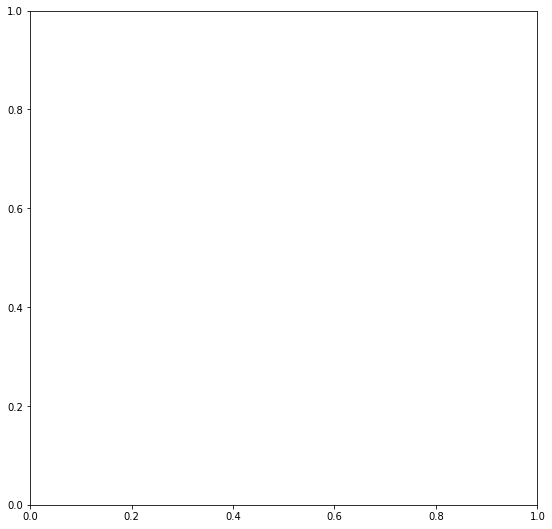

In [ ]:
fig = plt.figure(figsize=(20,20))

# Plot jalur busway dengan default basemap
ax = fig.add_subplot(221)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap Default")

# Plot jalur busway dengan Stamen
ax = fig.add_subplot(222)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap Stamen Toner Lite")

# Plot jalur busway dengan Carto DarkMatter
ax = fig.add_subplot(223)
tj_lines_mercator.plot(ax=ax, linewidth=2, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap CartoDB Dark Matter No Labels")

# Plot jalur busway dengan kelurahan Jakarta
# warnai jalur sesuai koridor
# harus menggunakan proyeksi yang sama
ax = fig.add_subplot(224)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=3, column="koridor", alpha=1, categorical=True, legend=True, k=13, cmap="Paired")
ax.axis("off")
ax.set_title("Jalur Busway")

NameError: ignored

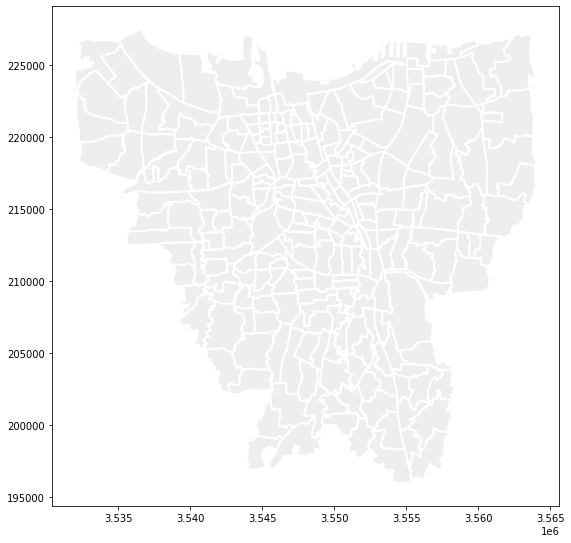

In [ ]:
# Menggunakan volume weekend vs weekday sebagai lebar jalur\
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=transjakarta_planar["Rata-rata Weekday"]/5000, column="koridor", alpha=1, k=13, cmap="Paired", categorical=True, legend=True)
ax.axis("off")
ax.set_title("Linewidth berdasar rata-rata weekday")

ax = fig.add_subplot(122)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=transjakarta_planar["Rata-rata Weekend"]/5000, column="koridor", alpha=1, k=13, cmap="Paired", categorical=True, legend=True)
ax.axis("off")
ax.set_title("Linewidth berdasar rata-rata weekend")

In [ ]:
!pip install openpyxl

3. Pada bagian 2.c anda diminta untuk melakukan hal yang sama dengan materi, namun, gantilah dengan menggunakan basemap yang lain. Hint: Gunakan ctx.providers?

NameError: ignored

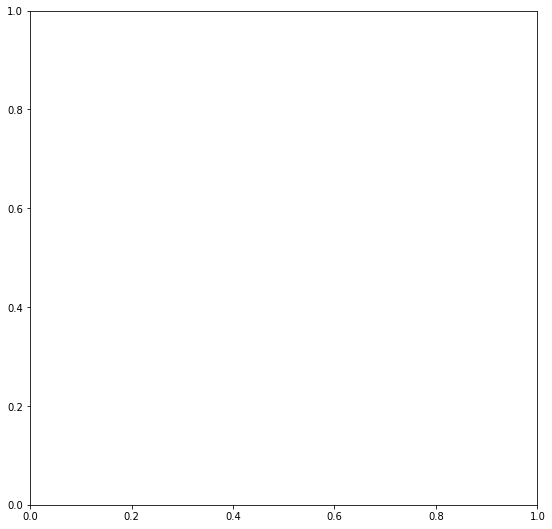

In [21]:
fig = plt.figure(figsize=(20,20))
# Plot jalur busway dengan Carto DarkMatter
ax = fig.add_subplot(223)
tj_lines_mercator.plot(ax=ax, linewidth=2, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis("off")
ax.set_title("Jalur Busway dengan Open Street Map")